# White wine quality

Life is too short to drink bad wine. 

Which features are the most indicative of a good quality wine?

# Table of contents
1. Data overview
2. Data preparation
3. Feature selection techniques
4. Feature extraction techniques <br>
    4.1. Principal Component Analysis (PCA) <br>
    4.2. Linear Discriminant Analysis (LDA)

In [1]:
# import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='whitegrid')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression

## 1. Data overview

In [2]:
# read csv file
df = pd.read_csv('winequality-white.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


<b> Input variables (based on physicochemical tests): </b>

1 - fixed acidity

2 - volatile acidity

3 - citric acid

4 - residual sugar

5 - chlorides

6 - free sulfur dioxide

7 - total sulfur dioxide

8 - density

9 - pH

10 - sulphates

11 - alcohol

<b> Output variable (based on sensory data): </b>

12 - quality (score between 0 and 10)

In [3]:
# data description
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [4]:
# missing values check
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

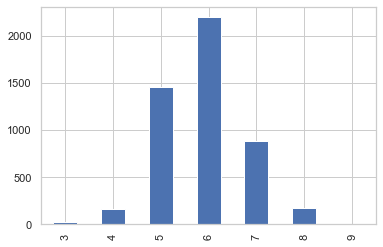

In [5]:
# quality distribution
df['quality'].value_counts().sort_index(ascending=True).plot(kind = 'bar');

In [6]:
df['quality'].value_counts().sort_index(ascending=True)

3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
Name: quality, dtype: int64

## 2. Data preparation

In [7]:
# split into training data and test data
X, y = df.iloc[:,:-1].values, df.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [8]:
# standardize features
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.fit_transform(X_test)

In [9]:
df.columns[:-1]

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

## 3. Feature selection techniques

In [10]:
# Correlation Thresholds

In [11]:
# Variance Thresholds

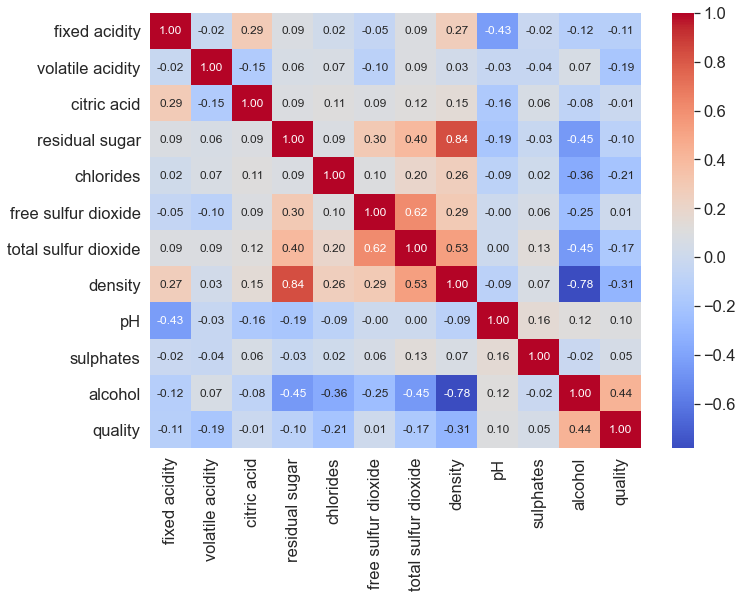

In [12]:
# create a heatmap with a matrix of correlations
plt.figure(figsize=(11,8))
cor = df.corr()
sns.set(font_scale=1.5)
sns.heatmap(cor, annot=True, cmap=plt.cm.coolwarm, annot_kws={'size':12}, fmt='.2f')
plt.show()

In [13]:
# Correlation with output variable
cor_target = abs(cor['quality'])
# Selecting highly correlated features
relevant_features = cor_target[cor_target>0.2]
relevant_features

chlorides    0.209934
density      0.307123
alcohol      0.435575
quality      1.000000
Name: quality, dtype: float64

 1) alcohol                        0.113962
 2) density                        0.102716
 3) volatile acidity               0.102076
 4) total sulfur dioxide           0.093352
 5) free sulfur dioxide            0.092987
 6) residual sugar                 0.087057
 7) pH                             0.085862
 8) chlorides                      0.085177
 9) citric acid                    0.080598
10) sulphates                      0.079584
11) fixed acidity                  0.076629


(-1.0, 11.0)

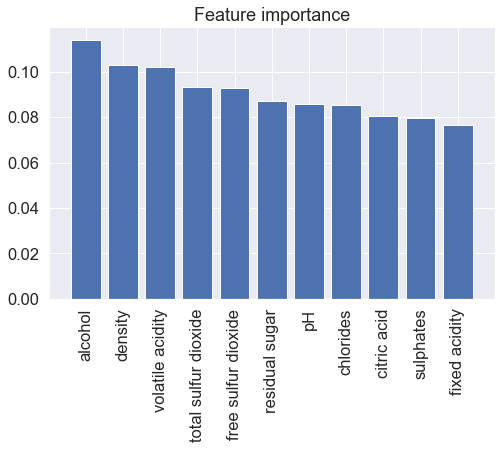

In [14]:
# Random Forest for determining feature importance
feat_labels = df.columns[:-1]
forest = RandomForestClassifier(n_estimators=10000,
                               random_state=42,
                               n_jobs=-1)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]


for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.figure(figsize=(8,5))
plt.title('Feature importance', size=18)
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])

## 4. Feature extraction techniques

### 4.1. Principal Component Analysis (PCA) 

In [15]:
# Principal Component Analysis (PCA) 
pca = PCA(random_state=42)
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.29297704, 0.14369848, 0.10959942, 0.0926799 , 0.08879757,
       0.08497552, 0.06660792, 0.05369946, 0.03823557, 0.02668483,
       0.00204429])

In [16]:
pca.components_[0]

array([ 0.15380294,  0.01121766,  0.14487984,  0.43018678,  0.20894662,
        0.30425805,  0.40747677,  0.51072912, -0.12904042,  0.03958429,
       -0.43455314])

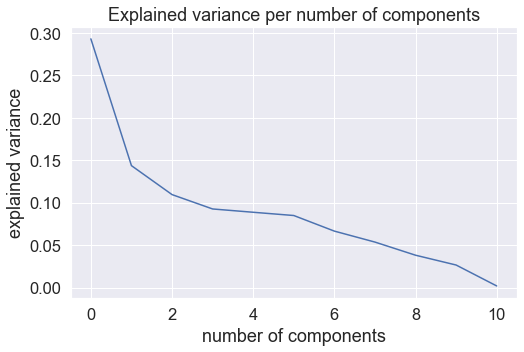

In [17]:
plt.figure(figsize=(8,5))
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.title('Explained variance per number of components', size=18);

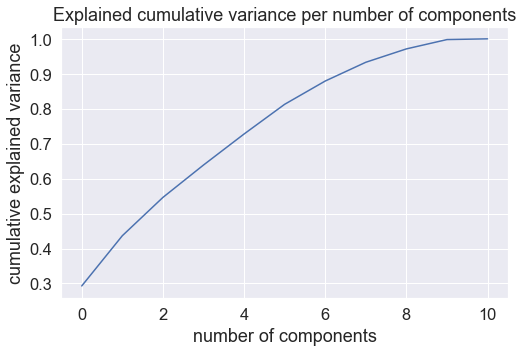

In [18]:
#pca = PCA().fit(df)
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title('Explained cumulative variance per number of components', size=18);

### 4.2. Linear Discriminant Analysis (LDA)

In [19]:
# Linear Discriminant Analysis (LDA)
lda = LDA(n_components=None)
X_train_lda = lda.fit_transform(X_train_std, y_train)